In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from nn import doughnut, squares, ANNClassification
import numpy as np
from torch import nn
import torch
from torch import optim


## Fitting data to the provided datasets

In [30]:
X,y = doughnut()
fitter = ANNClassification(units=[3], lambda_=0)
model = fitter.fit(X, y, lr=0.01, seed=100, epochs=10000, conv_loss=0.02)
predictions = model.predict(X)

loss: 1.0138084220306702, epoch: 0
acc: 0.523148148148149
loss: 0.6149524786532286, epoch: 100
acc: 0.8611111111111135
loss: 0.384344561850272, epoch: 200
acc: 0.8888888888888914
loss: 0.30666746062648137, epoch: 300
acc: 0.8842592592592617
loss: 0.28058460998007606, epoch: 400
acc: 0.8842592592592617
loss: 0.25135147242420763, epoch: 500
acc: 0.893518518518521
loss: 0.14917975282694826, epoch: 600
acc: 0.9583333333333361
loss: 0.06493144244153785, epoch: 700
acc: 0.9953703703703733
loss: 0.03668859423538258, epoch: 800
acc: 1.0000000000000029
loss: 0.025619735133182827, epoch: 900
acc: 1.0000000000000029
finished in 997 epochs, accurac: 1.0000000000000029, loss: 0.01999970764417384


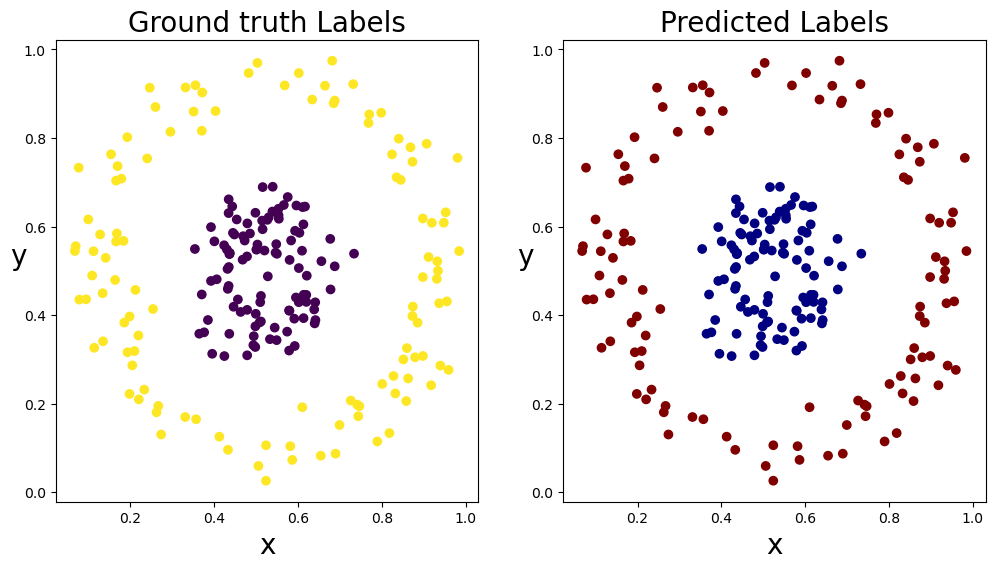

In [39]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis') 
axes[0].set_title("Ground truth Labels", fontsize=20)
axes[0].set_ylabel("y", rotation=0, fontsize=20)
axes[0].set_xlabel("x", rotation=0, fontsize=20)

# Convert softmax probabilities to predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Plot with predicted labels
axes[1].scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap="jet")
axes[1].set_title("Predicted Labels", fontsize=20)
axes[1].set_ylabel("y", rotation=0, fontsize=20)
axes[1].set_xlabel("x", rotation=0, fontsize=20)
plt.savefig("report/figures/doughnut.png")

In [40]:
X,y = squares()
fitter = ANNClassification(units=[5], lambda_=0)
model = fitter.fit(X, y, lr=0.01, seed=100, epochs=10000, conv_loss=0.01)
predictions = model.predict(X)

loss: 0.8465528646410351, epoch: 0
acc: 0.4850000000000004
loss: 0.7996145577612636, epoch: 100
acc: 0.4850000000000004
loss: 0.25450950412301654, epoch: 200
acc: 0.8849999999999921
loss: 0.14099656548809572, epoch: 300
acc: 0.939999999999991
loss: 0.09930797488743505, epoch: 400
acc: 0.9649999999999904
loss: 0.07967631516320611, epoch: 500
acc: 0.9799999999999901
loss: 0.0701647146086362, epoch: 600
acc: 0.9799999999999901
loss: 0.06398838414973636, epoch: 700
acc: 0.9799999999999901
loss: 0.059596313376861686, epoch: 800
acc: 0.9799999999999901
loss: 0.056273738828852, epoch: 900
acc: 0.9799999999999901
loss: 0.0536436911132698, epoch: 1000
acc: 0.9799999999999901
loss: 0.051488721851439684, epoch: 1100
acc: 0.9799999999999901
loss: 0.04967462840282463, epoch: 1200
acc: 0.9799999999999901
loss: 0.048114090023787484, epoch: 1300
acc: 0.9799999999999901
loss: 0.04674781482951468, epoch: 1400
acc: 0.9799999999999901
loss: 0.04553410103349206, epoch: 1500
acc: 0.9799999999999901
loss: 0.

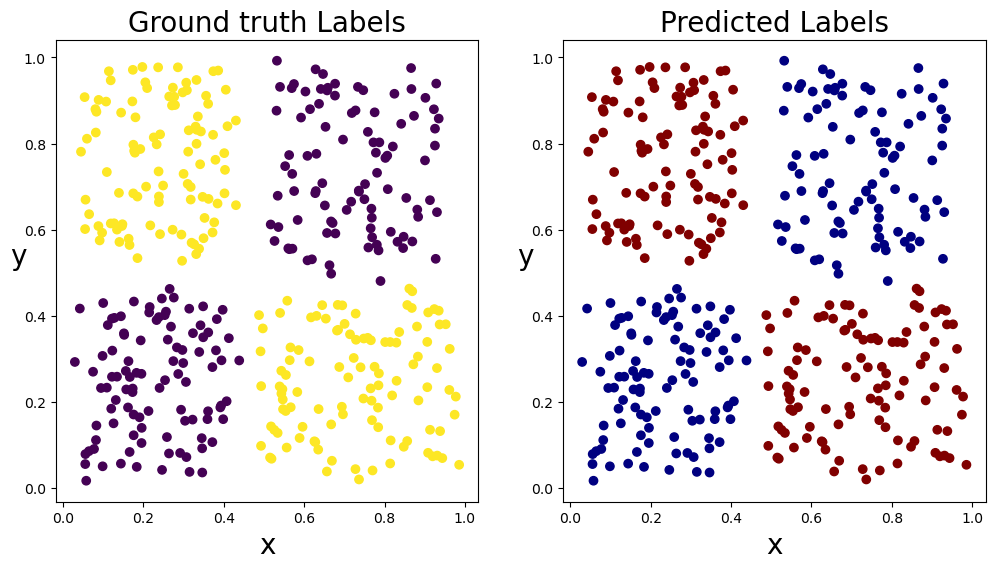

In [41]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis') 
axes[0].set_title("Ground truth Labels", fontsize=20)
axes[0].set_ylabel("y", rotation=0, fontsize=20)
axes[0].set_xlabel("x", rotation=0, fontsize=20)

# Convert softmax probabilities to predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Plot with predicted labels
axes[1].scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap="jet")
axes[1].set_title("Predicted Labels", fontsize=20)
axes[1].set_ylabel("y", rotation=0, fontsize=20)
axes[1].set_xlabel("x", rotation=0, fontsize=20)
plt.savefig("report/figures/squares.png")

## Comparing implementation with PyTorch

In [31]:
import torch
import torch.nn as nn
import torch.nn.init as init

# Use PyTorch
class ANNPytorch(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ANNPytorch, self).__init__()
        
        # Define the layers using nn.Sequential
        self.model = nn.Sequential(
            nn.Linear(input_dim, 5),
            nn.Sigmoid(),
            nn.Linear(5, 10),
            nn.Sigmoid(),
            nn.Linear(10, 5),
            nn.Sigmoid(),
            nn.Linear(5, output_dim),
            nn.Softmax(dim=1)
        )

        scale = 5.0  # Or any factor you want to control variance
        for layer in self.model:
            if isinstance(layer, nn.Linear):
                init.xavier_normal_(layer.weight)
                layer.weight.data *= scale  # Scale up the weights
                if layer.bias is not None:
                    init.zeros_(layer.bias)

    def forward(self, x):
        return self.model(x)


In [36]:
from sklearn.metrics import accuracy_score

lambdas = [0, 0.001, 0.01, 0.1]
datasets = [("squares", squares), ("doughnut", doughnut)]

epochs = 2000
units = [5, 10, 5]
results = []

torch.manual_seed(42)
for dataset_name, dataset_func in datasets:
    X_np, y_np = dataset_func()
    X_torch = torch.tensor(X_np, dtype=torch.float32)
    y_torch = torch.tensor(y_np, dtype=torch.long)
    output_dim = len(np.unique(y_np))

    for lambda_ in lambdas:
        print(f"\n=== Testing: Dataset={dataset_name}, Lambda={lambda_} ===")

        #  implementation
        ann_custom = ANNClassification(units=units, lambda_=lambda_)
        losses_my, accs_my = ann_custom.fit(X_np, y_np, lr=0.01, 
                                            seed=42, epochs=epochs,
                                              return_loss=True, verbose=True)
        acc_my = accs_my[-1]
        loss_my = losses_my[-1]

        # PyTorch implementation
        model = ANNPytorch(input_dim=X_np.shape[1], output_dim=output_dim)
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=3, weight_decay=lambda_)

        losses_pt = []
        accs_pt = []

        for epoch in range(epochs):
            model.train()
            logits = model(X_torch)
            loss = criterion(logits, y_torch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Store the loss and accuracy for each epoch
            losses_pt.append(loss.item())
            pred = torch.argmax(logits, dim=1)
            acc = (pred == y_torch).float().mean()
            accs_pt.append(acc.item())

        model.eval()
        preds = torch.argmax(model(X_torch), dim=1)
        acc_pt = accuracy_score(y_np, preds.detach().numpy())
        loss_pt = losses_pt[-1]

        print(f"→ Acc (Custom): {acc_my:.4f}, Loss (Custom): {loss_my:.4f}")
        print(f"→ Acc (PyTorch): {acc_pt:.4f}, Loss (PyTorch): {loss_pt:.4f}")

        # Save the entire loss history for both custom and PyTorch models
        results.append({
            "dataset": dataset_name,
            "lambda": lambda_,
            "acc_my": acc_my,
            "losses_my": losses_my,  # Save entire loss history for custom
            "acc_pt": acc_pt,
            "losses_pt": losses_pt  # Save entire loss history for PyTorch
        })



=== Testing: Dataset=squares, Lambda=0 ===
loss: 1.5722488314711673, acc: 0.515, epoch: 0
loss: 6.15356879041219, acc: 0.4850000000000004, epoch: 1
loss: 2.0673256220034366, acc: 0.4850000000000004, epoch: 6
loss: 2.089999385558886, acc: 0.515, epoch: 9
loss: 2.1412000363713837, acc: 0.515, epoch: 11
loss: 2.1576898837932004, acc: 0.515, epoch: 13
loss: 2.1620157266261395, acc: 0.515, epoch: 15
loss: 2.1625339296010884, acc: 0.515, epoch: 17
loss: 2.161919017080981, acc: 0.515, epoch: 19
loss: 2.1609666777378855, acc: 0.515, epoch: 21
loss: 2.1598935998873774, acc: 0.515, epoch: 23
loss: 2.1587411469340942, acc: 0.515, epoch: 25
loss: 2.1574952494052937, acc: 0.515, epoch: 27
loss: 2.1561194805420136, acc: 0.515, epoch: 29
loss: 2.1545609217853823, acc: 0.515, epoch: 31
loss: 2.1527456441589727, acc: 0.515, epoch: 33
loss: 2.1505667626499343, acc: 0.515, epoch: 35
loss: 2.1478616527427206, acc: 0.515, epoch: 37
loss: 2.1443676118260986, acc: 0.515, epoch: 39
loss: 2.139628585894679, a

KeyboardInterrupt: 

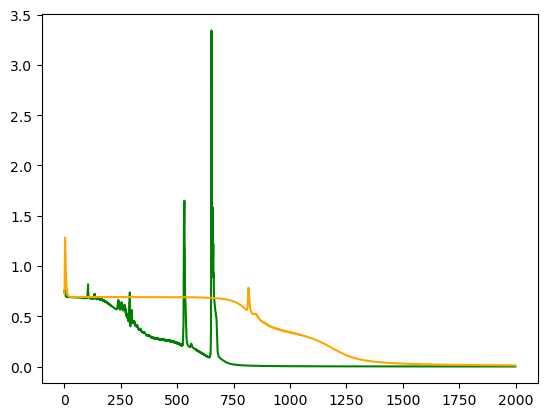

In [34]:
plt.plot(losses_my, color = "green")
#plt.plot(accs_my, linestyle="--", color="green")

plt.plot(losses_py, color="orange") 
#plt.plot(accs_py, linestyle="--", color="orange")